<a href="https://colab.research.google.com/github/ahmadsanafarooq/Data-Science-Machine-Learning-Nodebook/blob/main/Project_3_Bank_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import various functions to perform classification
from sklearn.model_selection import train_test_split

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Dataset**

In [2]:
df=pd.read_csv("/content/new_train.csv")

# **Explore Dataset**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# **Statistical Information**

In [6]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


# **Missing & Duplicate Values**

In [8]:
missing_values=df.isnull().sum()
missing_values

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


Observation:
* NO missing value



In [9]:
duplicate_values=int(df.duplicated().sum())
duplicate_values

8

In [10]:
df.drop_duplicates(inplace=True)

duplicated_values = int(df.duplicated().sum())
duplicated_values

0

Observation:
* There were eight duplicate values found.
* Now, the dataset has 0 duplicate value.


# **EDA**

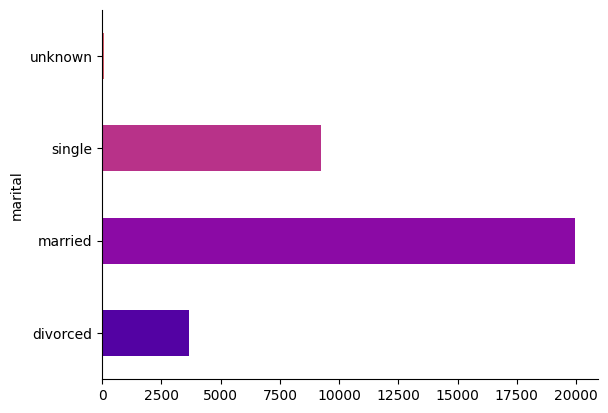

In [11]:
df.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('plasma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

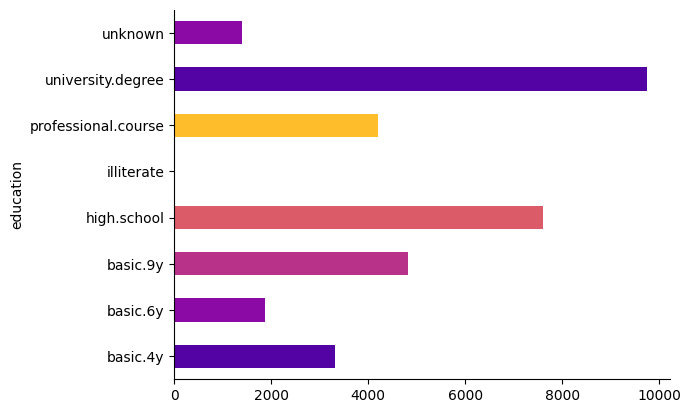

In [12]:
df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('plasma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

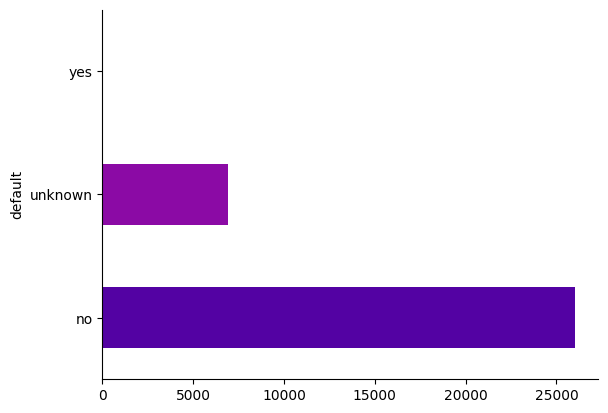

In [13]:
df.groupby('default').size().plot(kind='barh', color=sns.palettes.mpl_palette('plasma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

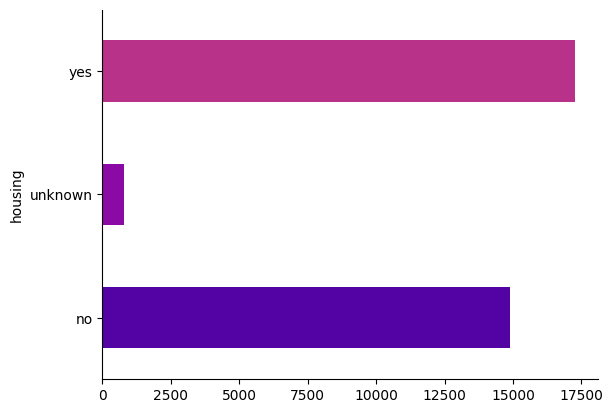

In [14]:
df.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('plasma'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

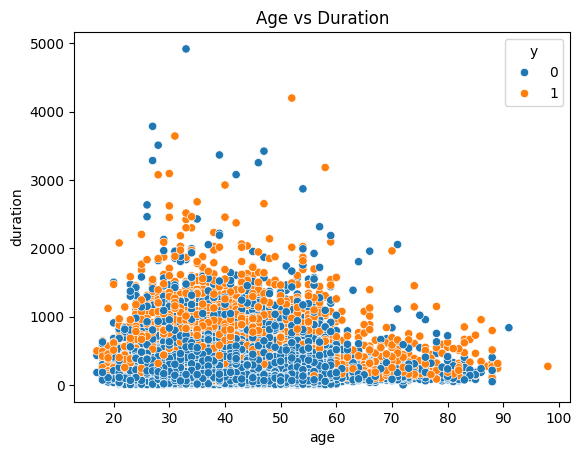

In [16]:
sns.scatterplot(x='age',y='duration',data=df,hue='y')
plt.title('Age vs Duration')
plt.show()

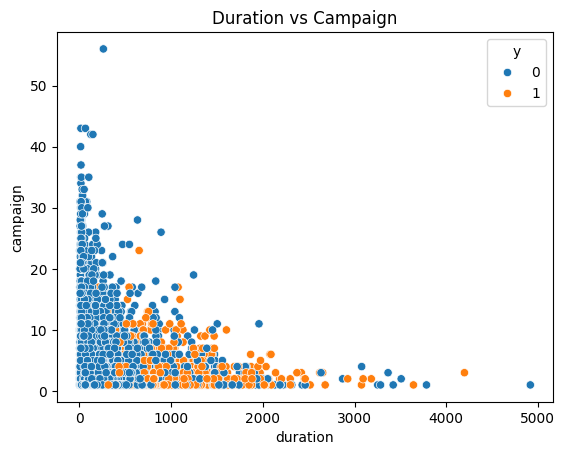

In [17]:
sns.scatterplot(x='duration',y='campaign',data=df,hue='y')
plt.title('Duration vs Campaign')
plt.show()

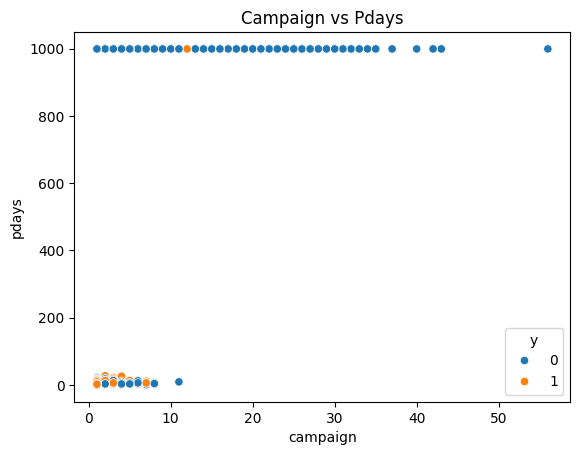

In [18]:
sns.scatterplot(x='campaign',y='pdays',data=df,hue='y')
plt.title('Campaign vs Pdays')
plt.show()

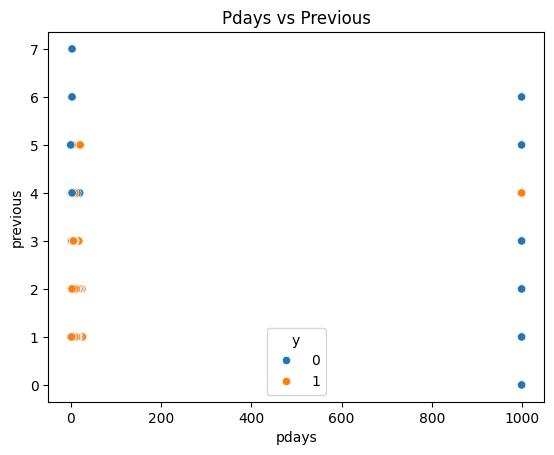

In [19]:
sns.scatterplot(x='pdays',y='previous',data=df,hue='y')
plt.title('Pdays vs Previous')
plt.show()

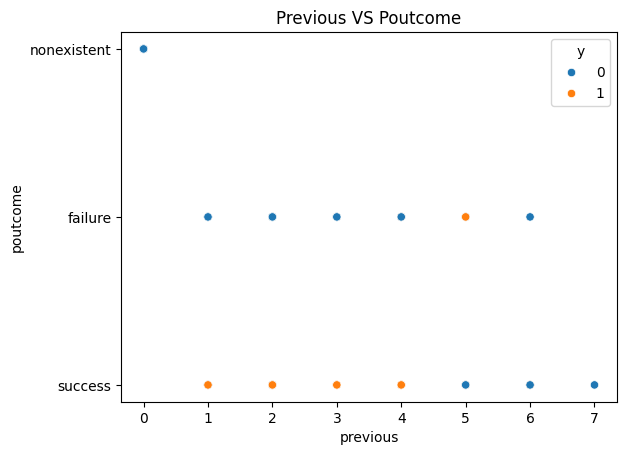

In [20]:
sns.scatterplot(x='previous',y='poutcome',data=df,hue='y')
plt.title('Previous VS Poutcome')
plt.show()

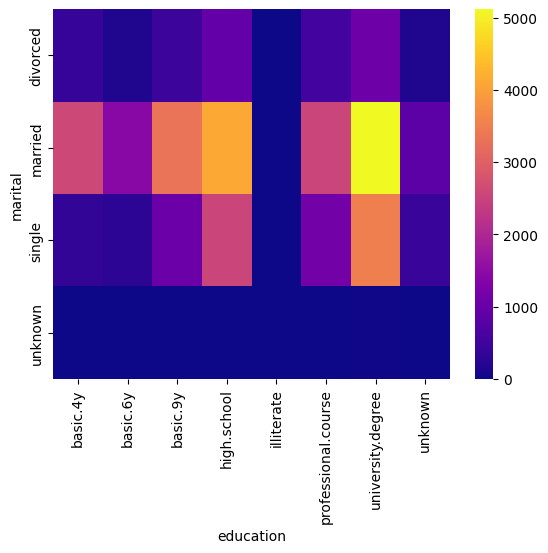

In [21]:
sns.heatmap(pd.crosstab(df['marital'],df['education']),annot=False,cmap='plasma')
plt.show()

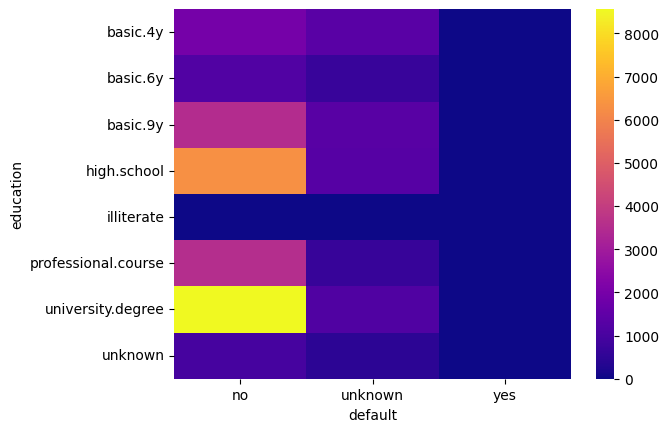

In [22]:
sns.heatmap(pd.crosstab(df['education'],df['default']),annot=False,cmap='plasma')
plt.show()

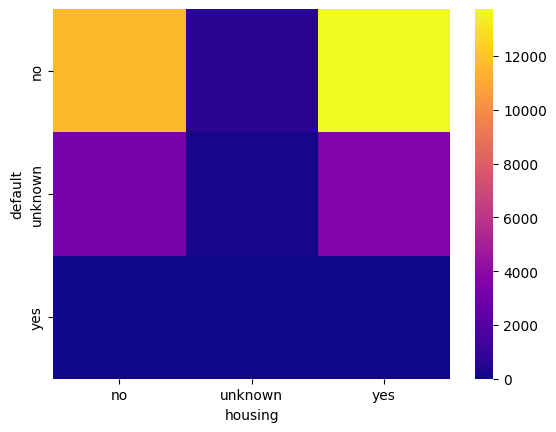

In [23]:
sns.heatmap(pd.crosstab(df['default'],df['housing']),annot=False,cmap='plasma')
plt.show()

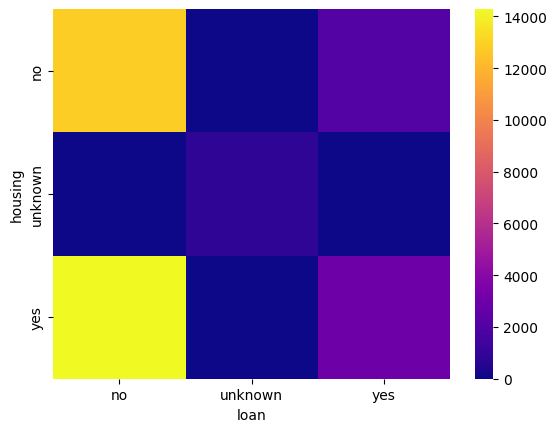

In [24]:
sns.heatmap(pd.crosstab(df['housing'],df['loan']),annot=False,cmap='plasma')
plt.show()

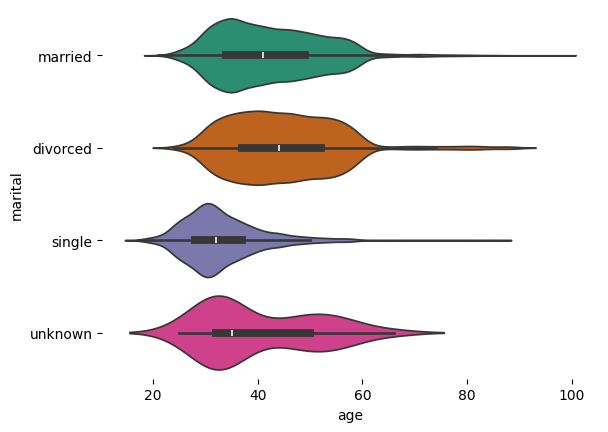

In [25]:
sns.violinplot(df, x='age', y='marital', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

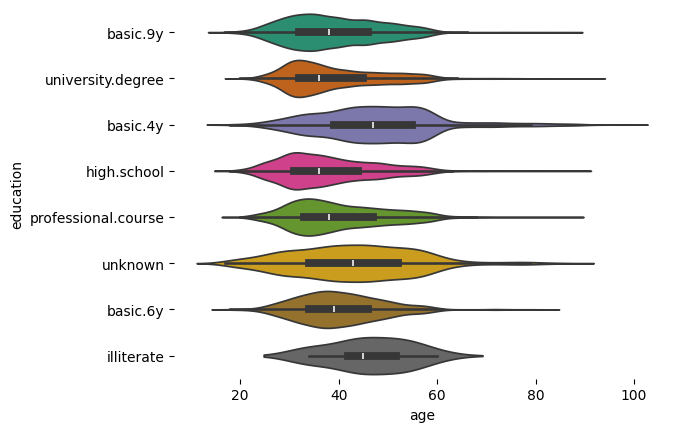

In [26]:
sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

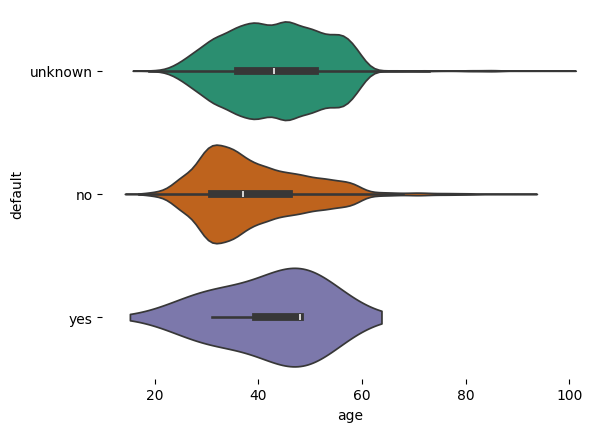

In [27]:
sns.violinplot(df, x='age', y='default', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

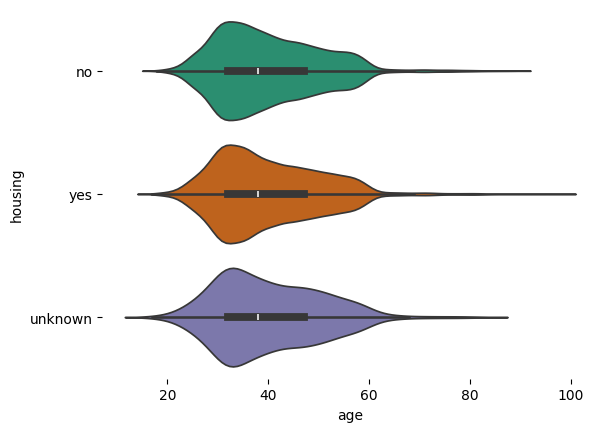

In [28]:
sns.violinplot(df, x='age', y='housing', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

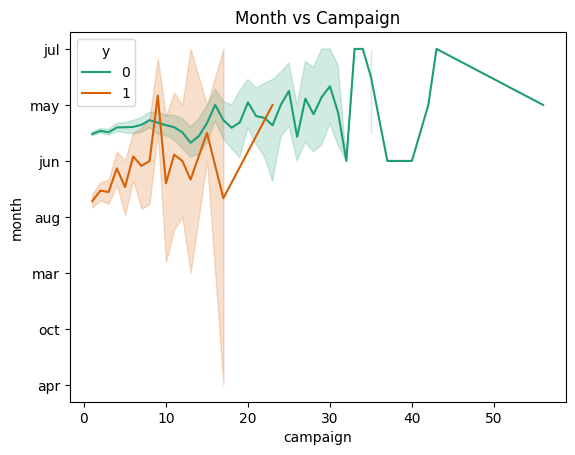

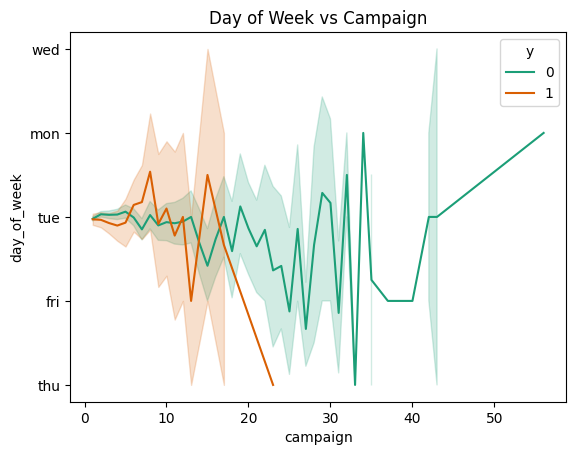

In [29]:
sns.lineplot(x='campaign', y='month', data=df, hue='y', palette='Dark2')
plt.title('Month vs Campaign')
plt.show()


sns.lineplot(x='campaign', y='day_of_week', data=df, hue='y', palette='Dark2')
plt.title('Day of Week vs Campaign')
plt.show()

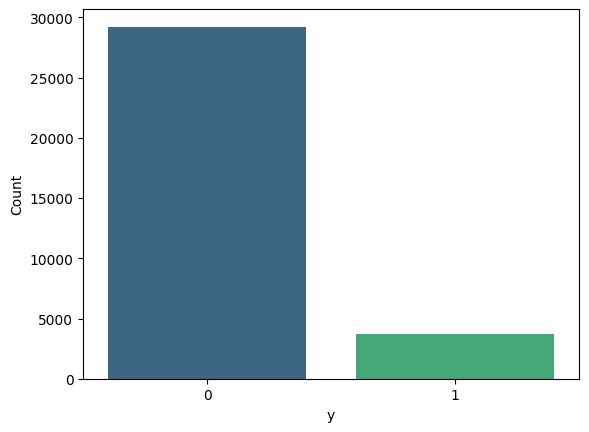

In [30]:
sns.countplot(x=df['y'], palette="viridis")
plt.ylabel("Count")
plt.show()

Observation:
* Data is imbalance

# **Drop unnecessary columns**

In [31]:
df.drop(['contact','poutcome','month','day_of_week','pdays','previous'],axis=1,inplace=True)

In [32]:
numeric_column = df.select_dtypes(include=['int64', 'float64'])
catagorical_column= df.select_dtypes(include=['object'])
print("Numerical Column",numeric_column.columns)
print("Catagorical Column",catagorical_column.columns)

Numerical Column Index(['age', 'duration', 'campaign', 'y'], dtype='object')
Catagorical Column Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')


# **Encode Catagorical Column**

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in catagorical_column:
  df[col]=le.fit_transform(df[col])

# **Train & Test Split**

In [34]:
x=df.drop('y',axis=1)
y=df['y']

In [35]:
print(x.shape)
print(y.shape)

(32942, 9)
(32942,)


In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26353, 9)
(6589, 9)
(26353,)
(6589,)


# **Machine Learning Models**
* LogisticRegression
* RandomForestClassifier
* GaussianNB
* KNeighborsClassifier
* SVC

In [37]:
lr=LogisticRegression()
rf=RandomForestClassifier()
nb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()

In [42]:
print("LogisticRegression")
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Classification Report \n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: \n",metrics.accuracy_score(y_test,y_pred))

LogisticRegression
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5815
           1       0.59      0.17      0.26       774

    accuracy                           0.89      6589
   macro avg       0.75      0.58      0.60      6589
weighted avg       0.86      0.89      0.86      6589

Confusion Matrix 
 [[5726   89]
 [ 645  129]]
Accuracy Score: 
 0.8886022158142358


In [43]:
print("RandomForestClassifier")
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Classification Report \n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: \n",metrics.accuracy_score(y_test,y_pred))

RandomForestClassifier
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5815
           1       0.52      0.25      0.34       774

    accuracy                           0.89      6589
   macro avg       0.71      0.61      0.64      6589
weighted avg       0.86      0.89      0.87      6589

Confusion Matrix 
 [[5635  180]
 [ 577  197]]
Accuracy Score: 
 0.8851115495522841


In [44]:
print("GaussianNB")
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print("Classification Report \n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: \n",metrics.accuracy_score(y_test,y_pred))

GaussianNB
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5815
           1       0.55      0.34      0.42       774

    accuracy                           0.89      6589
   macro avg       0.73      0.65      0.68      6589
weighted avg       0.87      0.89      0.88      6589

Confusion Matrix 
 [[5601  214]
 [ 510  264]]
Accuracy Score: 
 0.8901198967976931


In [45]:
print("KNeighborsClassifier")
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Classification Report \n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: \n",metrics.accuracy_score(y_test,y_pred))

KNeighborsClassifier
Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      5815
           1       0.51      0.24      0.33       774

    accuracy                           0.88      6589
   macro avg       0.71      0.61      0.63      6589
weighted avg       0.86      0.88      0.86      6589

Confusion Matrix 
 [[5633  182]
 [ 587  187]]
Accuracy Score: 
 0.8832903323721354


In [46]:
print("SVC")
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Classification Report \n",classification_report(y_test,y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("Accuracy Score: \n",metrics.accuracy_score(y_test,y_pred))

SVC
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5815
           1       0.60      0.18      0.28       774

    accuracy                           0.89      6589
   macro avg       0.75      0.58      0.61      6589
weighted avg       0.87      0.89      0.86      6589

Confusion Matrix 
 [[5720   95]
 [ 631  143]]
Accuracy Score: 
 0.8898163606010017


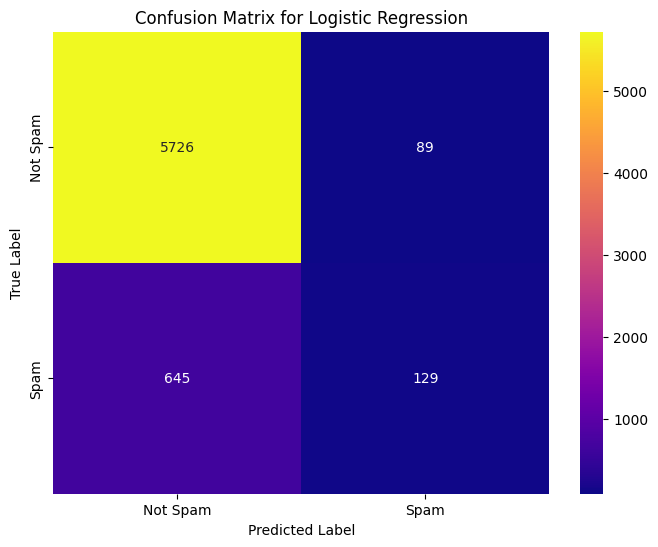

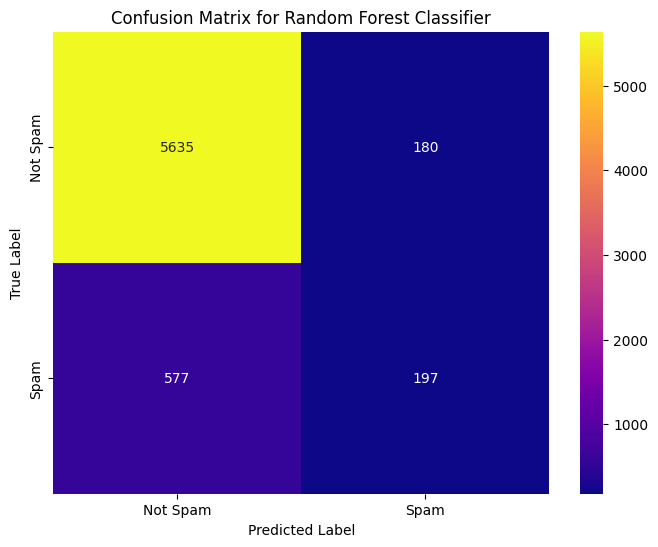

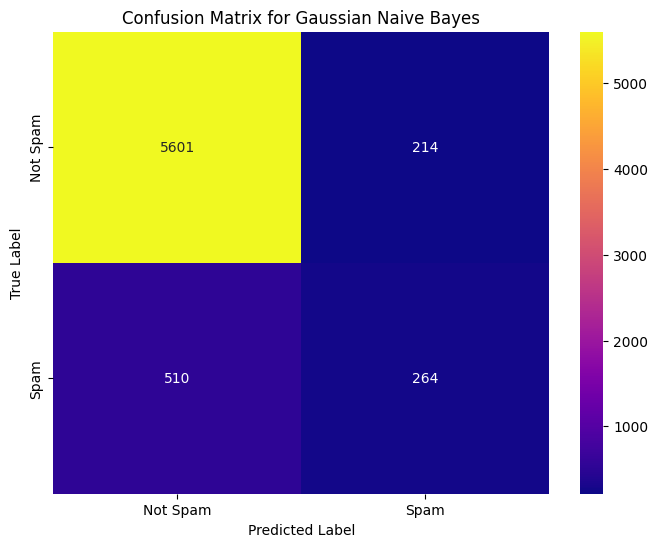

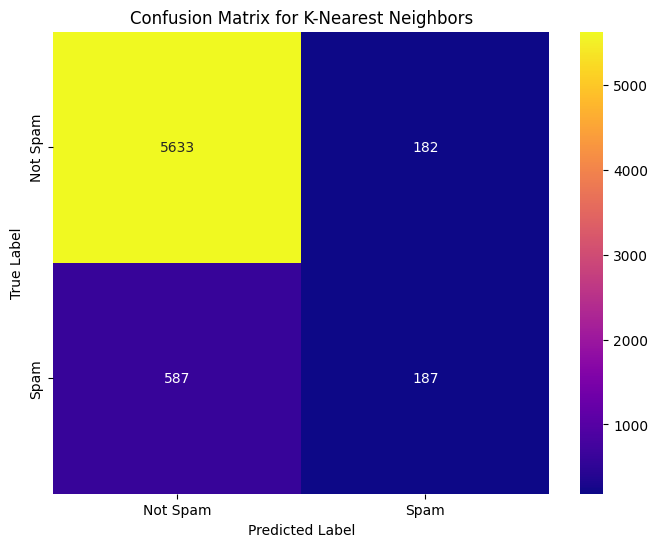

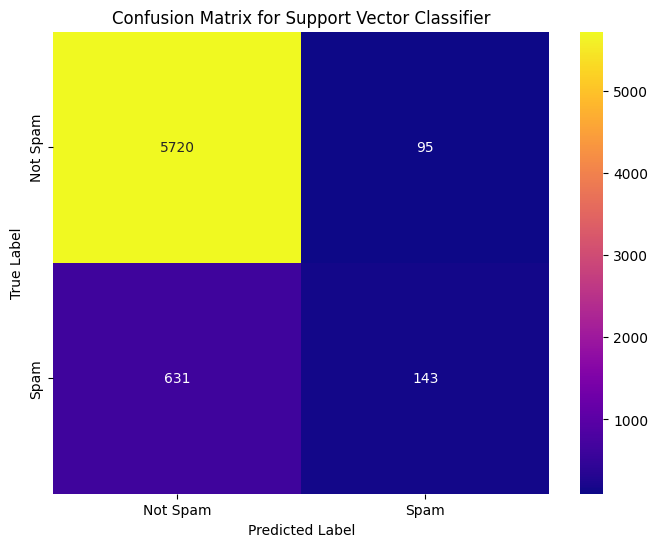

In [47]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="plasma",
              xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

plot_confusion_matrix(y_test, lr.predict(x_test), "Logistic Regression")
plot_confusion_matrix(y_test, rf.predict(x_test), "Random Forest Classifier")
plot_confusion_matrix(y_test, nb.predict(x_test), "Gaussian Naive Bayes")
plot_confusion_matrix(y_test, knn.predict(x_test), "K-Nearest Neighbors")
plot_confusion_matrix(y_test, svc.predict(x_test), "Support Vector Classifier")

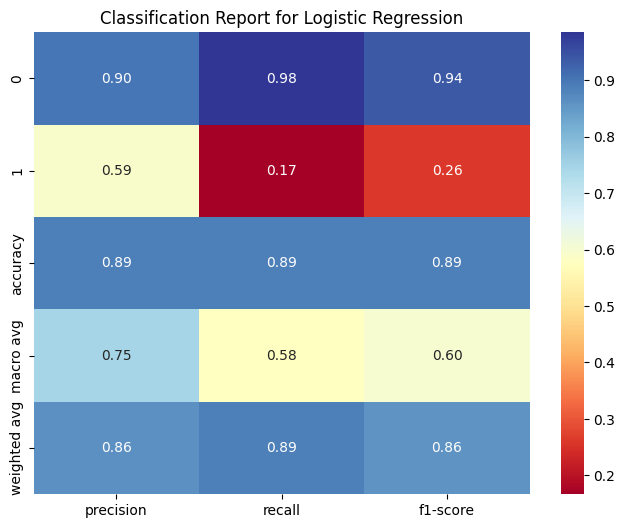

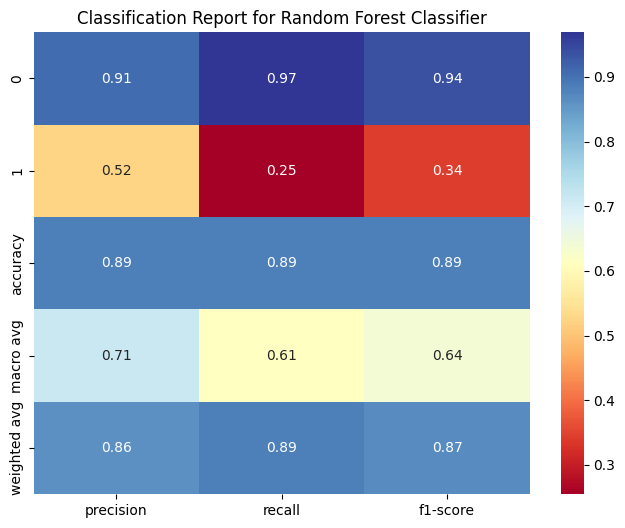

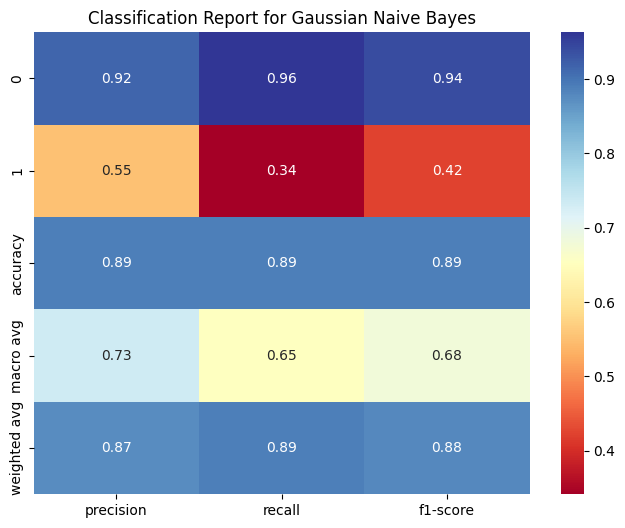

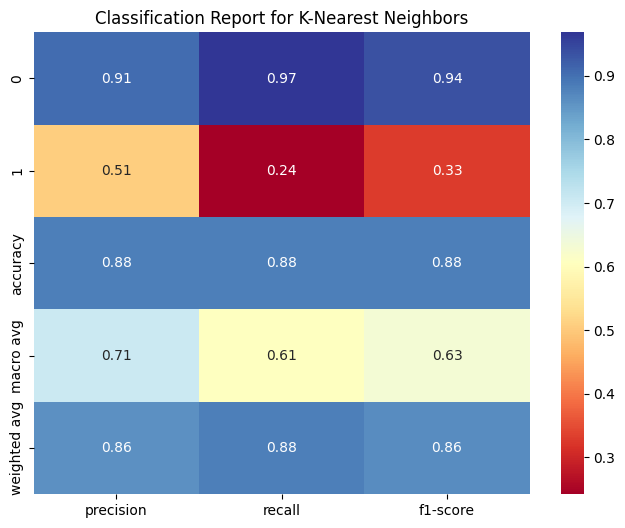

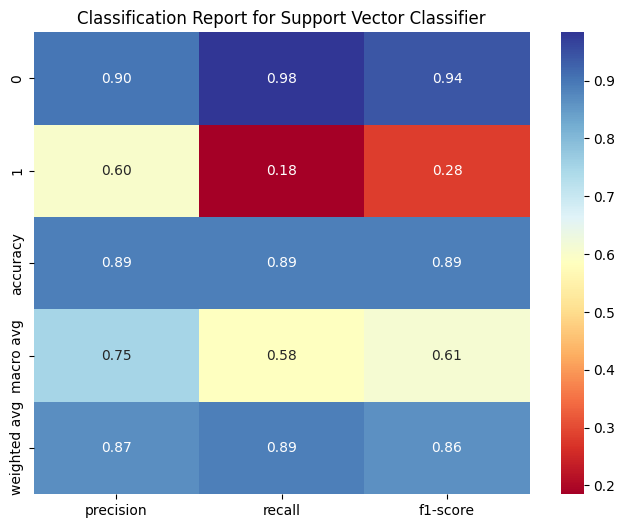

In [48]:
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_classification_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="RdYlBu")
    plt.title(f'Classification Report for {model_name}')
    plt.show()

plot_classification_report(y_test, lr.predict(x_test), "Logistic Regression")
plot_classification_report(y_test, rf.predict(x_test), "Random Forest Classifier")
plot_classification_report(y_test, nb.predict(x_test), "Gaussian Naive Bayes")
plot_classification_report(y_test, knn.predict(x_test), "K-Nearest Neighbors")
plot_classification_report(y_test, svc.predict(x_test), "Support Vector Classifier")

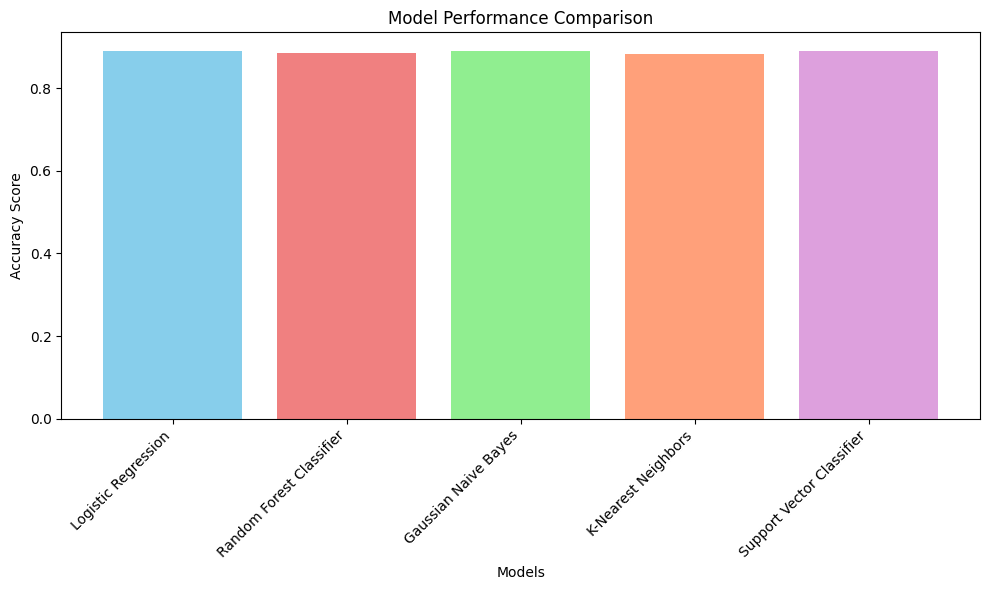

In [49]:
model_scores = {
    'Logistic Regression': lr.score(x_test, y_test),
    'Random Forest Classifier': rf.score(x_test, y_test),
    'Gaussian Naive Bayes': nb.score(x_test, y_test),
    'K-Nearest Neighbors': knn.score(x_test, y_test),
    'Support Vector Classifier': svc.score(x_test, y_test),
}

models = list(model_scores.keys())
scores = list(model_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()